## Mahdi Anvari 610700002 Homework 2 of Machine Learning Question 4

In [28]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sbn

• Load MNIST dataset (could be accessed using from keras.datasets in python)

In [6]:
mnist_path = 'c:/Users/M/Downloads/mnist.npz'
with np.load(mnist_path, allow_pickle=True) as f:
    X_train, Y_train = f['x_train'], f['y_train']
    X_test, Y_test = f['x_test'], f['y_test']
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
NormalizedXtrain = scaler.fit_transform(X_train)
NormalizedXtest = scaler.fit_transform(X_test)

(60000, 784)
(10000, 784)


a. Logistic Regression

In [23]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, Y_train)
Y_pred = LogReg.predict(X_test)
LogAccuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy for logistic regression:", LogAccuracy)

Accuracy for logistic regression: 0.9214


C:\Users\M\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


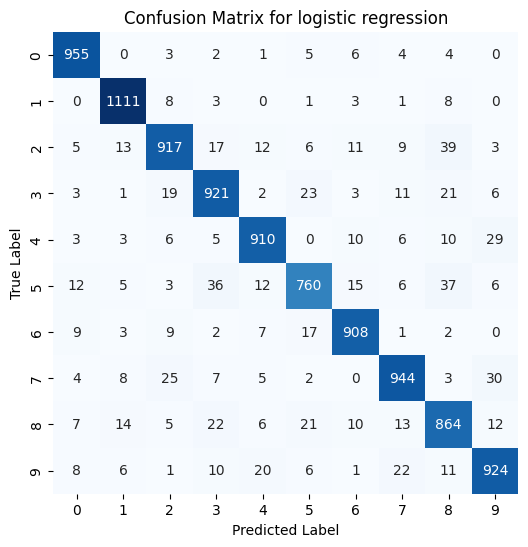

In [29]:
LogCM = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
sbn.heatmap(LogCM, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for logistic regression')
plt.show()

b. MLP with one hidden layer of size 128